# Breast Cancer with PCA and Hyperparameter Tuning

In [57]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_breast_cancer
plt.style.use('ggplot')
colors_one = sns.color_palette('Set2')
colors_two = sns.color_palette('Paired')

In [58]:
cancer = load_breast_cancer(as_frame = True)

In [59]:
df = cancer.frame

In [60]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
pca = PCA(n_components = 3)

X = df.drop('target', axis = 1)
y = df['target']

In [62]:
print(X.shape, y.shape)

(569, 30) (569,)


In [63]:
X_scale = sc.fit_transform(X)
X_pca = pca.fit_transform(X_scale)

In [64]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca

,PCA1,PCA2,PCA3
0,9.192837,1.948583,-1.123173
1,2.387802,-3.768172,-0.529303
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232798
4,3.935302,-1.948071,1.389763
...,...,...,...
564,6.439315,-3.576817,2.459483
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562734
567,10.374794,1.672010,-1.877023


C:\Users\HP\AppData\Local\Temp\ipykernel_17924\71701294.py:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x = df_pca['PCA1'], y = df_pca['PCA3'], ax = ax[1], hue = df.target, palette = colors_one)
C:\Users\HP\AppData\Local\Temp\ipykernel_17924\71701294.py:5: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.scatterplot(x = df_pca['PCA2'], y = df_pca['PCA3'], ax = ax[2], hue = df.target, palette = colors_two)


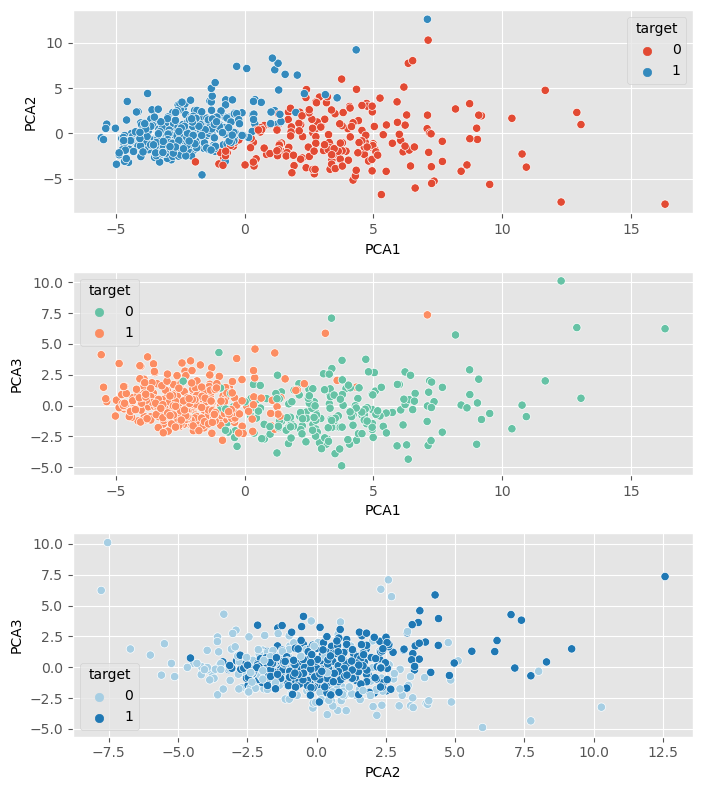

In [65]:
fig, ax = plt.subplots(figsize = (7,8), nrows = 3, ncols = 1)

sns.scatterplot(x = df_pca['PCA1'], y = df_pca['PCA2'], ax = ax[0], hue = df.target)
sns.scatterplot(x = df_pca['PCA1'], y = df_pca['PCA3'], ax = ax[1], hue = df.target, palette = colors_one)
sns.scatterplot(x = df_pca['PCA2'], y = df_pca['PCA3'], ax = ax[2], hue = df.target, palette = colors_two)
plt.tight_layout()
plt.show()

In [66]:
# Choose PCA1 & 2
dfnew_pca = df_pca.drop('PCA3', axis = 1)

In [68]:
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_

In [72]:
print(var, var_ratio)

[13.30499079  5.7013746   2.82291015] [0.44272026 0.18971182 0.09393163]


In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

clf = SGDClassifier()
svc = SVC()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.27)

In [83]:
X_train.shape

(415, 3)

In [84]:
y_train.shape

(415,)

In [86]:
X_test.shape

(154, 3)

In [87]:
y_test.shape

(154,)

In [105]:
clf.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC()

In [109]:
y_pred_clf = clf.predict(X_test)
y_pred_svc = svc.predict(X_test)
print('Accuracy using SGDClassifier: ', accuracy_score(y_test, y_pred_clf))
print('Accuracy using SVC: ', accuracy_score(y_test, y_pred_svc))

Accuracy using SGDClassifier:  0.935064935064935
Accuracy using SVC:  0.961038961038961


<Axes: >

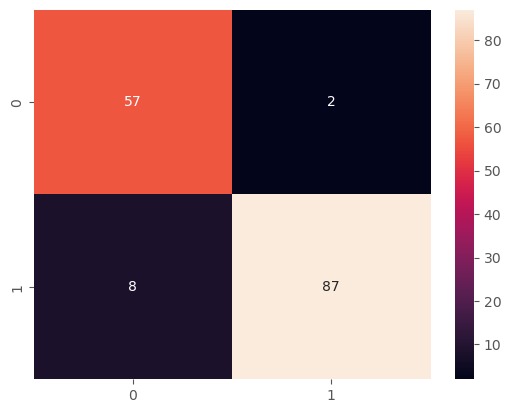

In [113]:
sns.heatmap(confusion_matrix (y_test, y_pred_clf), annot = True)

<Axes: >

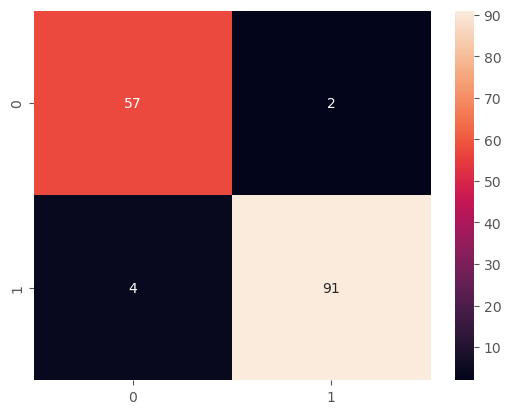

In [111]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot  = True)

In [122]:
params_grid_1 = {
    'C':[0.01,0.1,1,10],
    'gamma': [0.01,0.1,1,'auto'],
    'kernel':['linear', 'rbf', 'poly']
}

param_grid_2 = {
    'loss':['hinge', 'log_loss', 'modified_huber'],
    'max_iter': [10,100,1000,10000,100000],
    'alpha': [0.00001,0.0001,0.001,0.01,0.1,1]
}

In [123]:
grid_search_svc = GridSearchCV(svc, param_grid = params_grid_1, cv = 5)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [0.01, 0.1, 1, 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [124]:
grid_search_sgdcls = GridSearchCV(clf, param_grid = param_grid_2, cv = 5)
grid_search_sgdcls.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log_loss', 'modified_huber'],
                         'max_iter': [10, 100, 1000, 10000, 100000]})

In [126]:
best_params_svc = grid_search_svc.best_params_
print('Best Parameter', best_params_svc)

Best Parameter {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}


In [127]:
best_params_sgdclf = grid_search_sgdcls.best_params_
print('Best Parameter', best_params_sgdclf)

Best Parameter {'alpha': 0.001, 'loss': 'log_loss', 'max_iter': 100}


In [129]:
best_model_svc = grid_search_svc.best_estimator_
y_pred_grid_svc = best_model_svc.predict(X_test)

In [130]:
best_model_clf = grid_search_sgdcls.best_estimator_
y_pred_grid_clf = best_model_clf.predict(X_test)

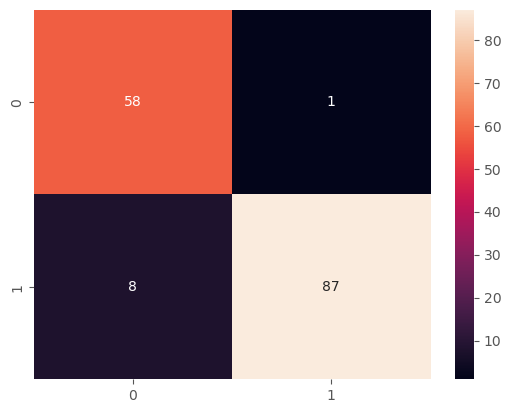

In [132]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_svc), annot = True)
plt.show()

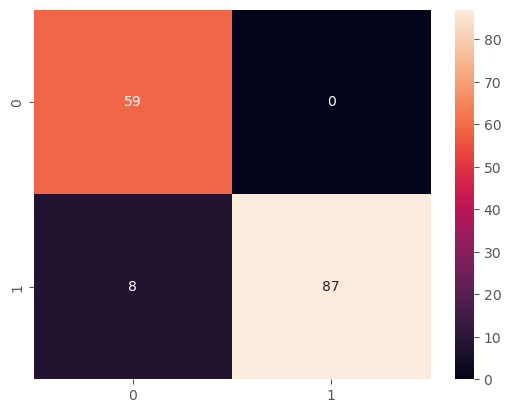

In [133]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_clf), annot = True)
plt.show()

In [134]:
print('Accuracy using SVC: ', accuracy_score(y_test, y_pred_svc))
print('Accuracy using SGDClassifier: ', accuracy_score(y_test, y_pred_clf))
print('Accuracy using GridSearchCV with SVC: ', accuracy_score(y_test, y_pred_grid_svc))
print('Accuracy using GridSearchCV with SGDClassifier: ', accuracy_score(y_test, y_pred_grid_clf))

Accuracy using SVC:  0.961038961038961
Accuracy using SGDClassifier:  0.935064935064935
Accuracy using GridSearchCV with SVC:  0.9415584415584416
Accuracy using GridSearchCV with SGDClassifier:  0.948051948051948


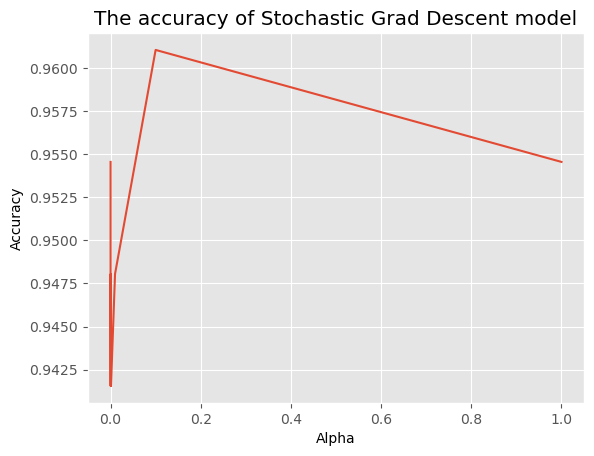

In [146]:
alphas = [0.0001,0.0002,0.0005,0.001,0.01,0.1,1]
accuracies = []
for al in alphas:
    clf = SGDClassifier(alpha=al)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
sns.lineplot(x = alphas, y = accuracies)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('The accuracy of Stochastic Grad Descent model')
plt.show()

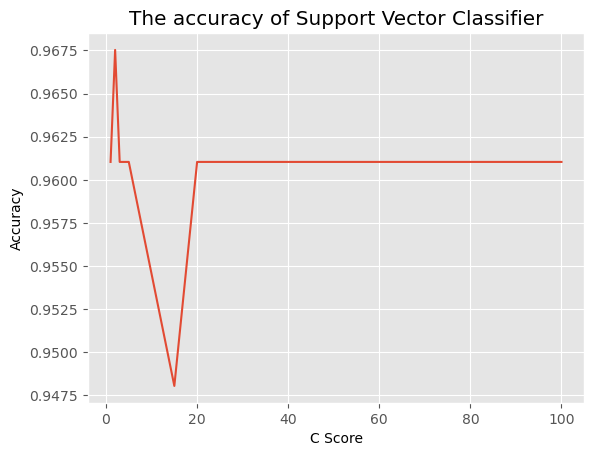

In [151]:
C = [1,2,3,4,5,10,15,20,25,30,40,50,60,70,80,90,100]
accuracies = []
for c in C:
    svc = SVC(C = c)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc =  accuracy_score(y_test, y_pred)
    accuracies.append(acc)
sns.lineplot(x = C, y = accuracies)
plt.xlabel('C Score')
plt.ylabel('Accuracy')
plt.title('The accuracy of Support Vector Classifier')
plt.show()